<a href="https://colab.research.google.com/github/KFurudate/gene_simulation/blob/main/20201011_gene_simulation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thanks for:

http://www.biology.kyushu-u.ac.jp/~kteshima/Information/20170802_simulation_selection-drift.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

import time

### 個体単位から集団単位のシミュレーションへ

親集団中の頻度から、子孫集団の遺伝子頻度を直接、計算する。

集団中の状態をAとaで表そう。Aが祖先型を表し、aはAから派生したものとする。
まずはこの遺伝子にはこれ以上の突然変異がおこらないものと仮定して、次世代のallele aの頻度を求める。
aの頻度を p で表す。
Aおよびaという遺伝子のタイプの違いが生存や生殖に影響しないものとすると、次世代のaタイプの期待頻度は p のまま、変わらない。

各個体は確率 p でタイプaになり、確率 1−p でタイプAになる。
集団全体で考えると平均で 2N×p の個体がタイプaを受け継ぐ。

実際の次世代中のタイプaの個体数は二項分布に従う。


### 二項乱数を用いたシミュレーション

In [2]:
size=100
derived=40

In [3]:
derived = np.random.binomial(n=size, p=derived/size)
derived

49

In [4]:
# initialization

derived = 40
size = 100

# trajectory
tr = [derived/size]


# 50 generations
for i in range(50):
    
    # make next generation
    derived = np.random.binomial(n=size, p=derived/size)
    tr.append(derived/size)

print(tr)

[0.4, 0.44, 0.38, 0.34, 0.36, 0.42, 0.43, 0.43, 0.47, 0.49, 0.53, 0.45, 0.42, 0.31, 0.38, 0.37, 0.43, 0.51, 0.51, 0.5, 0.44, 0.44, 0.5, 0.5, 0.55, 0.47, 0.52, 0.5, 0.58, 0.64, 0.65, 0.6, 0.62, 0.57, 0.62, 0.61, 0.55, 0.6, 0.72, 0.7, 0.74, 0.78, 0.76, 0.69, 0.67, 0.74, 0.77, 0.79, 0.78, 0.82, 0.84]


In [5]:
sim = []

derived = 40
size = 100

howmany = 1000
end_sim = 1000

start = time.time()

for j in range(howmany):
    
    derived = 40
    tr = [derived/size]
    
    for i in range(end_sim):
        # make the next generation
        derived = np.random.binomial(n=size, p=derived/size)
        tr.append( derived/size )
    
    sim.append(tr)

    
elapsed = time.time()-start
print("elapsed time: {0:.3f} sec".format(elapsed) ) 

elapsed time: 3.455 sec


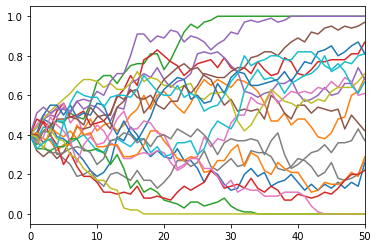

In [8]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for i in range(20):
    ax.plot(sim[i])
ax.set_xlim(0, 50)
plt.show()

### 自然選択の影響
遺伝子座２対立遺伝子モデルの場合を考える。それぞれの遺伝子型の適応度を以下のように仮定する。

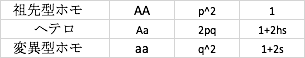











のときaの増分、 Δq は、$$
Δq=2spq[q+h(p−q)]1+2sq(2hp+q)
$$

であり、次世代の頻度の期待値は、
$$
q+Δq=q[1+2s(hp+q)]1+2sq(2hp+q)
$$

以下では近似して、$$
Δq=2spq[q+h(p−q)]
$$

In [10]:
# 二項乱数の頻度として次世代の期待頻度を入れることで二項乱数を利用したシミュレーションを使う
# initialization

derived = 40
size = 100
# selection coefficient
s = 0.1
h = 0.5

# trajectory
tr = [derived/size]


# 50 generations
for i in range(50):
    
    # calc the effect of selection
    q = derived/size
    p = 1-q
    delta_q = 2*s*p*q*(q+h*(p-q))

    # number of derived alleles in the next generation
    derived = np.random.binomial(n=size, p=q+delta_q)
    
    tr.append( derived/size )

print(tr)

[0.4, 0.42, 0.47, 0.53, 0.52, 0.54, 0.64, 0.68, 0.67, 0.73, 0.74, 0.81, 0.81, 0.85, 0.87, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### s=0.01の場合
allele a がAに対して1%有利であった場合について、固定確率を計算する。
初期頻度は1, すなわち新しい変異が生まれたばかりの状態。

In [11]:
# generate empty list
sim = []

# patameters
derived = 1
size = 100
s = 0.01
h =0.5

# simulation condition
end_sim = 1000
howmany = 10000

# simulation starts
start = time.time()

for j in range(howmany):
    
    # initialize trajectory data
    derived = 1
    tr = [derived/size]
        
    for i in range(end_sim):

        # calc the effect of selection
        q = derived/size
        p = 1-q
        delta_q = 2*s*p*q*(q+h*(p-q))

        # number of derived alleles in the next generation
        derived = np.random.binomial(n=size, p=q+delta_q)
        tr.append( derived/size )    
    
    # append simulation result
    sim.append(tr)

# simulation ends
elapsed = time.time()-start

# print run-time
print("elapsed time: {0:.3f} sec".format(elapsed) ) 

elapsed time: 36.567 sec


In [12]:
data = np.array(sim)

print(data.shape)
print(data.dtype)
print("\n")

print(data[0])
print(data[0].shape)
print(data[0].dtype)

(10000, 1001)
float64


[0.01 0.01 0.03 ... 0.   0.   0.  ]
(1001,)
float64


In [13]:
# データから固定した変異（集団全体に広まった変異）の割合を求める

# 元々は行が各シミュレーション、列が世代を表す。
# 転置後のデータの1番下は、1000世代経ったあとの各突然変異の運命(0: 集団から消失、1:固定される)
last_gen = data.T[-1]

print("Fate of all mutants")
print( last_gen )
print( len(last_gen) )
print("\n")

print("Fixed mutants")
print( last_gen[ last_gen>0 ] )
print( len(last_gen[ last_gen>0 ] ) )
print("\n")

prop = len(last_gen[last_gen>0])/len(last_gen)
print( "proportion of fixed mutants: {0:.3f}".format( prop ) )

Fate of all mutants
[0. 0. 0. ... 1. 0. 0.]
10000


Fixed mutants
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
238


proportion of fixed mutants: 0.024


### s=0.05の場合
自然選択をもっと強くし、5%有利であった場合の固定確率

In [14]:
sim = []

# parameters
derived = 1
size = 100
s = 0.05
h =0.5

# condition
end_sim = 1000
howmany = 10000

# simulation starts
start = time.time()

for j in range(howmany):
    
    # initialize trajectory data
    derived = 1
    tr = [derived/size]
        
    for i in range(end_sim):

        # calc the effect of selection
        q = derived/size
        p = 1-q
        delta_q = 2*s*p*q*(q+h*(p-q))

        # number of derived alleles in the next generation
        derived = np.random.binomial(n=size, p=q+delta_q)
        tr.append( derived/size )    

    # append simulation result
    sim.append(tr)

# simulation ends
elapsed = time.time()-start

# print run-time
print("elapsed time: {0:.3f} sec".format(elapsed) ) 

#
# fixation probability
#
last_gen = np.array(sim).T[-1]
prop = len(last_gen[last_gen>0])/len(last_gen)
print( "proportion of fixed mutants when s={0:.3f}: {1:.5f}".format( s, prop ) )

elapsed time: 36.679 sec
proportion of fixed mutants when s=0.050: 0.09480


### s=0の場合
もし自然選択の影響がない場合の固定確率

In [15]:

# parameters
derived = 1
size = 100
s = 0.
h =0.5

# condition
end_sim = 1000
howmany = 10000

# simulation starts
start = time.time()

for j in range(howmany):
    
    # initialize trajectory data
    derived = 1
    tr = [derived/size]
        
    for i in range(end_sim):

        # calc the effect of selection
        q = derived/size
        p = 1-q
        delta_q = 2*s*p*q*(q+h*(p-q))

        # number of derived alleles in the next generation
        derived = np.random.binomial(n=size, p=q+delta_q)

        tr.append( derived/size )    

        
    # append simulation result
    sim.append(tr)

# simulation ends
elapsed = time.time()-start

# print run-time
print("elapsed time: {0:.3f} sec".format(elapsed) ) 

#
# fixation probability
#
last_gen = np.array(sim).T[-1]
prop = len(last_gen[last_gen>0])/len(last_gen)
print( "proportion of fixed mutants when s={0:.3f}: {1:.5f}".format( s, prop ) )

elapsed time: 36.786 sec
proportion of fixed mutants when s=0.000: 0.05180


### 期待値とシミュレーションの比較
自然選択の強さ s 、ヘテロ個体のdoinanceの程度を表す係数 h 、が与えられた時にその固定確率を返すシミュレートする関数

In [16]:
def calc_fix_p(s, h):
    sim = []
    derived = 1
    size = 100
    end_sim = 1000
    howmany = 10000
    
    for j in range(howmany):
        derived = 1
        tr = [derived/size]
        #pop = Drift_with_selection(size, init, s, h)
        #tr.extend([ pop.next()/size for i in range(end_sim)])
        
        for i in range(end_sim):
            # calc the effect of selection
            q = derived/size
            p = 1-q
            delta_q = 2*s*p*q*(q+h*(p-q))
            # number of derived alleles in the next generation
            derived = np.random.binomial(n=size, p=q+delta_q)
            tr.append( derived/size )    

        sim.append(tr)
        
    last_gen = np.array(sim).T[-1]
    
    return len(last_gen[last_gen>0])/len(last_gen)

In [17]:
selection = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

start = time.time()

fixp_data = [calc_fix_p(s, 0.5) for s in selection]

elapsed = time.time()-start
print("elapsed time: {0:.3f} sec".format(elapsed) ) 

elapsed time: 351.108 sec


In [18]:
# 固定確率は理論的に求めることができ、理論的な期待値は 2s 
expectation_s = [2*i for i in selection]

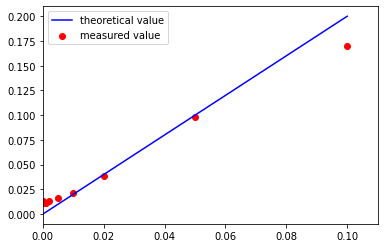

In [20]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.scatter(selection, fixp_data, c="red", label="measured value")
ax.plot(selection, expectation_s, c="blue", label="theoretical value")
ax.set_xlim(0,.11)

ax.legend(loc='upper left')
plt.show()

In [22]:
expectation_n = [.01 for i in selection]
expectation_s1 = [2*i/(1-np.exp(-2*size*i)) for i in selection]
expectation_s2 = [(1-np.exp(-2*i))/(1-np.exp(-2*size*i)) for i in selection]

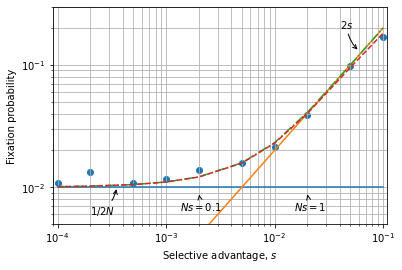

In [23]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")

ax.scatter(selection, fixp_data)
ax.plot(selection, expectation_n)
ax.plot(selection, expectation_s)
ax.plot(selection, expectation_s1, linestyle='dashdot')
ax.plot(selection, expectation_s2, linestyle='dashed')


ax.set_xlim(0.00009,.11)
ax.set_ylim(0.005,.3)
ax.set_xlabel("Selective advantage, $s$")
ax.set_ylabel("Fixation probability")

ax.annotate("$Ns=1$", xy=(0.02,.009), xytext=(.015,.0065),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("$Ns=0.1$", xy=(0.002,.009), xytext=(.00135,.0065),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("$1/2N$", xy=(0.00035,.01), xytext=(.0002,.006),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate("$2s$", xy=(0.06,.13), xytext=(.04,.2),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()